In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df_train=pd.read_csv("/content/SalaryData_Train.csv")
df_test=pd.read_csv("/content/SalaryData_Test.csv")

df_train.shape
df_test.shape

(15060, 14)

In [3]:
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0.5, 0, 'age'),
  Text(1.5, 0, 'educationno'),
  Text(2.5, 0, 'capitalgain'),
  Text(3.5, 0, 'capitalloss'),
  Text(4.5, 0, 'hoursperweek')])

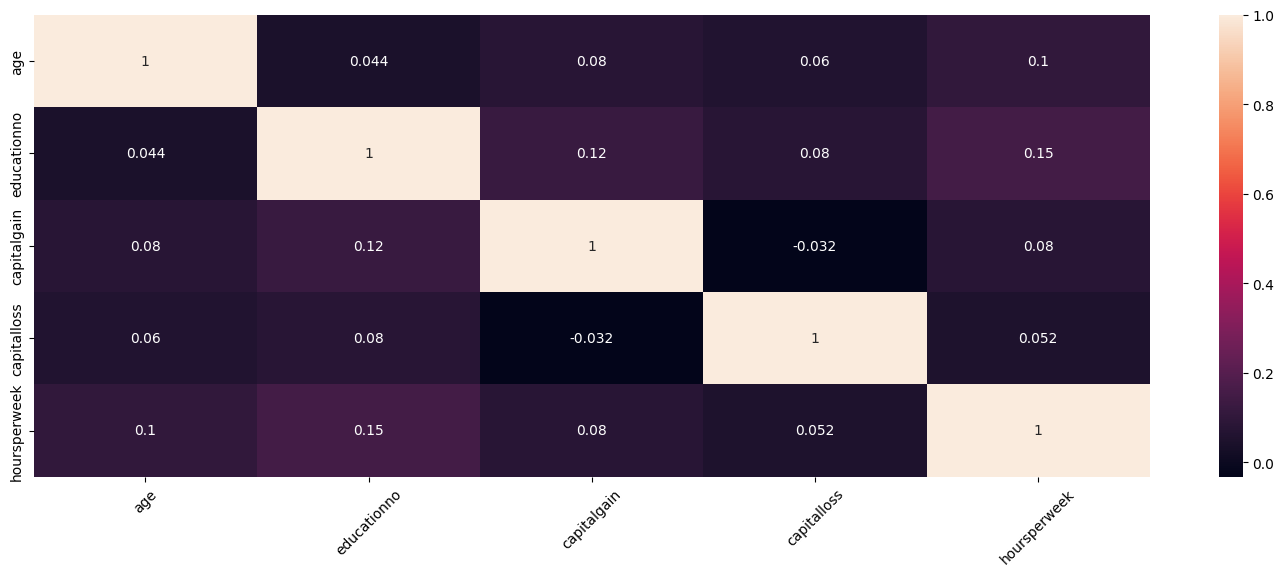

In [4]:
#EDA
#Heatmap(Train)
fig= plt.figure(figsize=(18, 6))
sns.heatmap(df_train.corr(), annot=True);
plt.xticks(rotation=45)


(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0.5, 0, 'age'),
  Text(1.5, 0, 'educationno'),
  Text(2.5, 0, 'capitalgain'),
  Text(3.5, 0, 'capitalloss'),
  Text(4.5, 0, 'hoursperweek')])

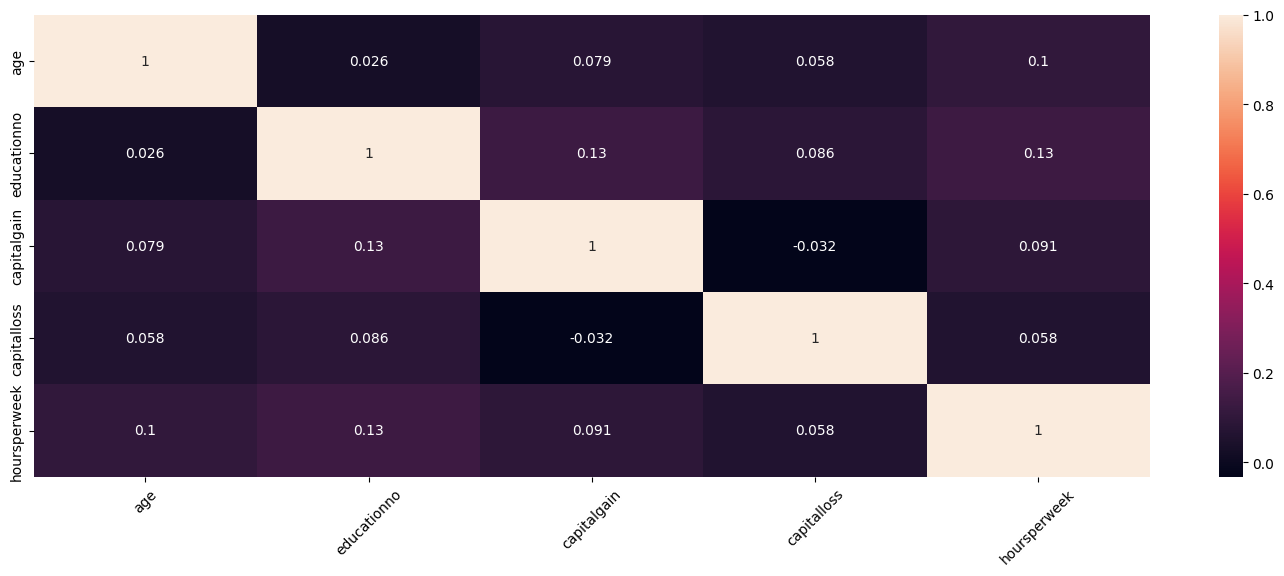

In [5]:
#Heatmap(test)
fig= plt.figure(figsize=(18, 6))
sns.heatmap(df_test.corr(), annot=True);
plt.xticks(rotation=45)

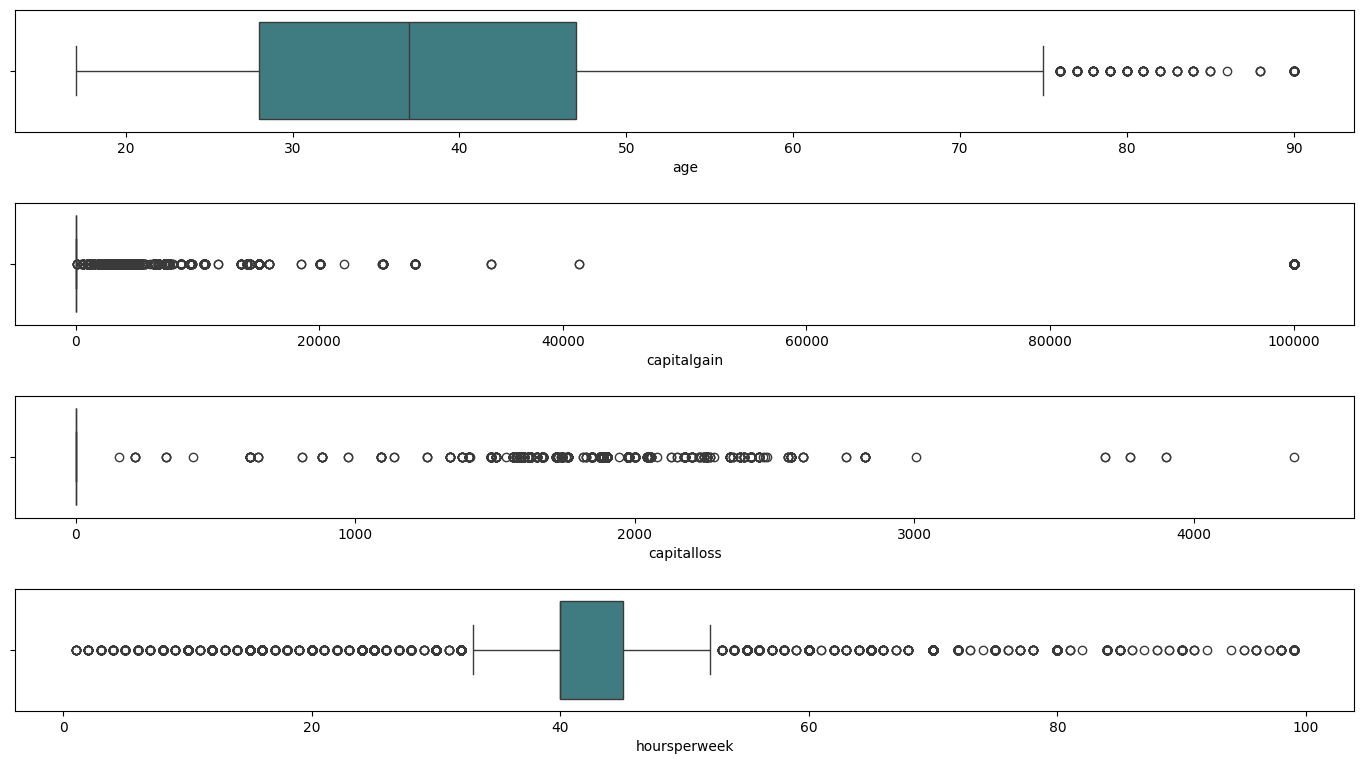

In [6]:
#Boxplot(train)

ot=df_train.copy()
fig, axes=plt.subplots(4,1,figsize=(14,8),sharex=False,sharey=False)
sns.boxplot(x='age',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='capitalgain',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='capitalloss',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='hoursperweek',data=ot,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

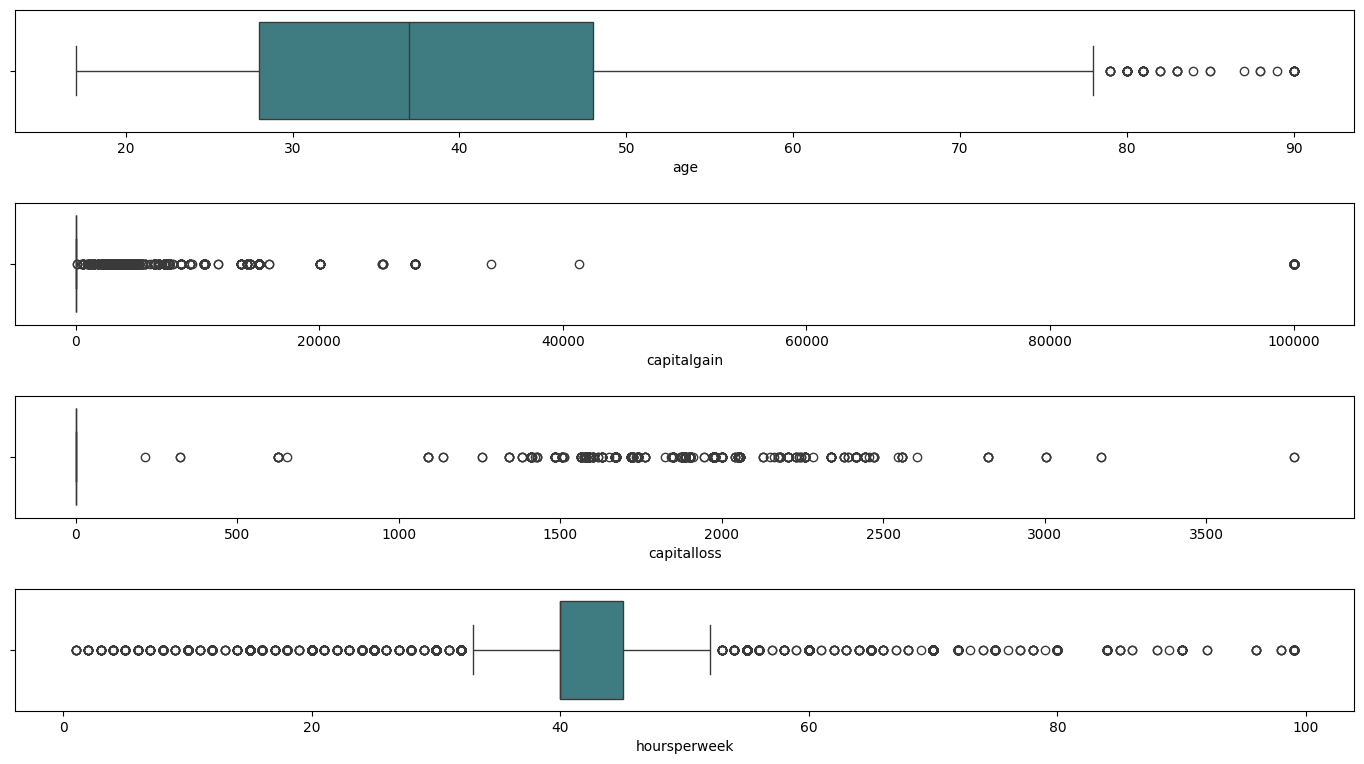

In [7]:
#Boxplot(test)

ot=df_test.copy()
fig, axes=plt.subplots(4,1,figsize=(14,8),sharex=False,sharey=False)
sns.boxplot(x='age',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='capitalgain',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='capitalloss',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='hoursperweek',data=ot,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

In [8]:
#Data Spliting(Train)
X_train=df_train.drop(columns=["Salary"])
Y_train=df_train[["Salary"]]

#Data Spliting(Test)
X_test=df_test.drop(columns=["Salary"])
Y_test=df_test[["Salary"]]


In [9]:
#Encoding(Train)
from sklearn.preprocessing import LabelEncoder
categorical_columns1= ['workclass', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native']
LE=LabelEncoder()

for column in categorical_columns1:
  X_train[column]=LE.fit_transform(X_train[column])


Y_train["Salary"]=LE.fit_transform(Y_train["Salary"])

In [10]:
#Encoding(Test)
categorical_columns2= ['workclass', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native']
for column in categorical_columns2:
    X_test[column]=LE.fit_transform(X_test[column])

Y_test["Salary"]=LE.fit_transform(Y_test["Salary"])


In [11]:
#Dropping
X_train=X_train.drop("education",axis=1)
X_test=X_test.drop("education",axis=1)

In [12]:
#Multinomial NB
# Preparing a Multinomial naive bayes model on training data set

from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()

MNB.fit(X_train,Y_train) # Bo + b1x1 + B2x2
Y_pred_train = MNB.predict(X_train)
Y_pred_test = MNB.predict(X_test)

from sklearn.metrics import accuracy_score
# Model Accuracy on train set
training_accuracy = accuracy_score(Y_train,Y_pred_train).round(3)
# Model Accuracy on test set
test_accuracy = accuracy_score(Y_test,Y_pred_test).round(3)

print(training_accuracy)
print(test_accuracy)

0.773
0.775


In [13]:
#Categorical NB

# Preparing a Categorical naive bayes model on training data set
from sklearn.naive_bayes import CategoricalNB

CNB = CategoricalNB()

CNB.fit(X_train,Y_train) # Bo + b1x1 + B2x2
Y_pred_train = CNB.predict(X_train)
Y_pred_test = CNB.predict(X_test)

from sklearn.metrics import accuracy_score
# Model Accuracy on train set
training_accuracy = accuracy_score(Y_train,Y_pred_train).round(3)
# Model Accuracy on test set
test_accuracy = accuracy_score(Y_test,Y_pred_test).round(3)

print(training_accuracy)
print(test_accuracy)

0.855
0.854


In [14]:
#Gaussian NB

# Preparing a Gaussian naive bayes model on training data set
from sklearn.naive_bayes import GaussianNB
GB=GaussianNB()
GB.fit(X_train,Y_train) # Bo + b1x1 + B2x2
Y_pred_train = GB.predict(X_train)
Y_pred_test = GB.predict(X_test)

from sklearn.metrics import accuracy_score
# Model Accuracy on train set
training_accuracy = accuracy_score(Y_train,Y_pred_train).round(3)
# Model Accuracy on test set
test_accuracy = accuracy_score(Y_test,Y_pred_test).round(3)

print(training_accuracy)
print(test_accuracy)

0.793
0.794


In [15]:
#Inference: Categorical Naive Bayes gives us better Accuracy which is about 85%.